In [1]:
import nbsetup
import pickle
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

In [2]:
SAVE_FIGURES = True
xlabel = 'Log($g_S$) [$ms^{-2}$]'

In [3]:
standard = Result(load_sparc(namespace='baseline/201_21'))

In [4]:
with open('standard.pickle', 'wb') as fh:
    pickle.dump(standard, fh)

In [5]:
standard.counts()

Everything 3327 169
Quality data 2096 97
Quality simulation 1482 97


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


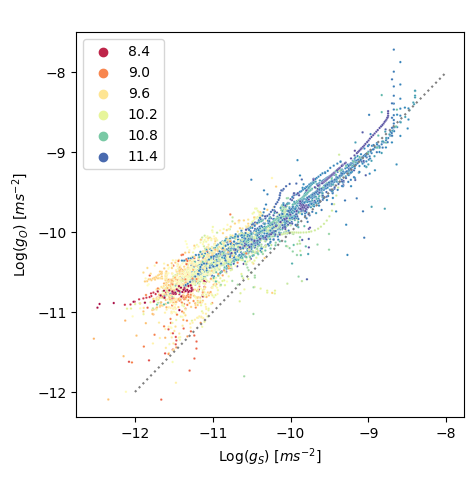

In [6]:
g = standard.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)
if SAVE_FIGURES: g.get_figure().savefig('../figures/baseline_rar.eps')

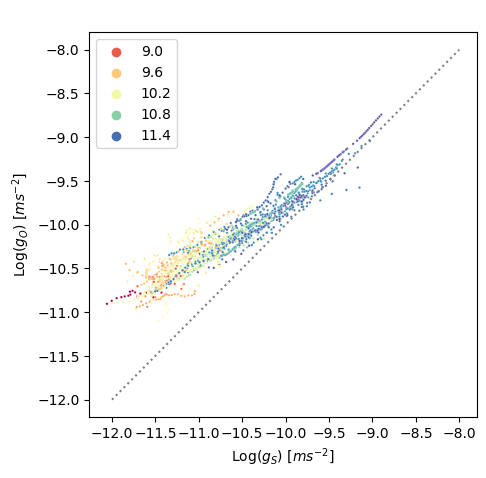

In [7]:
g = standard.plot_rar(kind=0, title=' ', query_key='Quality simulation', label=xlabel)

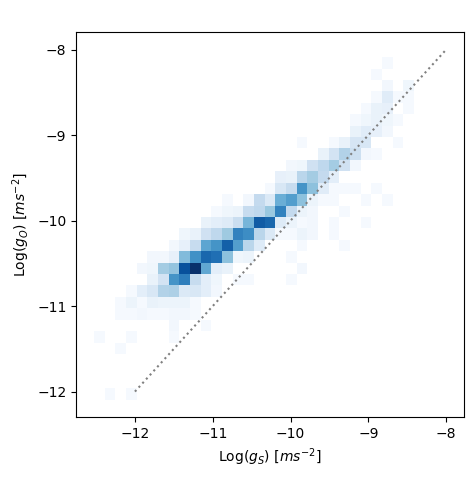

In [8]:
g = standard.plot_rar(kind=3, title=' ', query_key='Quality data', label=xlabel)

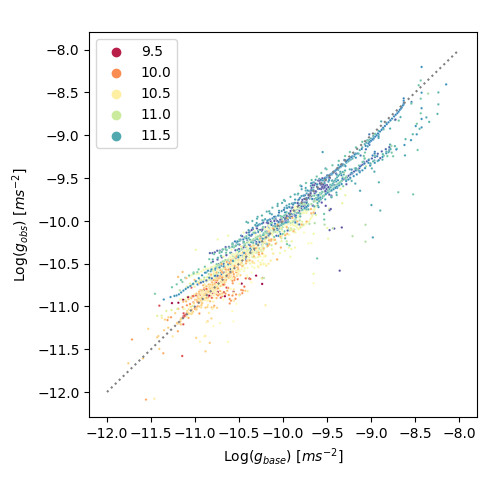

In [11]:
analysis = Tune(mcmc(standard.datasets()['Quality data'], train_d=False, tight={'Inc': 0.01, 'Ymass': 0.01}))
tuned = analysis.Result(True, simulations=standard.simulations)
g = tuned.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)

In [12]:
tuned.residual_stats()

,filter,mean,std,count,mse,rmse
0,Everything,-0.021615,0.197436,2096,0.039429,0.198568
1,Quality data,-0.021615,0.197436,2096,0.039429,0.198568
2,Quality simulation,0.028558,0.132027,1482,0.018235,0.135037


In [14]:
standard.residual_stats()

,filter,mean,std,count,mse,rmse
0,Everything,0.451363,0.322552,3327,0.307737,0.554740
1,Quality data,0.473521,0.312920,2096,0.322094,0.567534
2,Quality simulation,0.525857,0.272625,1482,0.350800,0.592283
